NIM GENAP = 2702224282

DATASET A_23

In [1]:
import zipfile
import os

In [2]:
zip_path = 'A_23.zip'           # ganti namanya sesuai dengan dataset yang udah kita upload
extract_path = '/content/dataset'  # tempat ekstraknya

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Cek isi foldernya
print(os.listdir(extract_path))

['A_23']


mengekstrak file ZIP bernama A_23.zip ke folder /content/dataset, lalu menampilkan daftar isi folder tersebut setelah diekstrak.

In [3]:
image_folder = os.path.join(extract_path, 'A_23')

image_paths = [os.path.join(image_folder, fname)
               for fname in os.listdir(image_folder)
               if fname.lower().endswith(('.jpg', '.jpeg', '.png'))]

mengambil semua path gambar (.jpg, .jpeg, .png) dari folder A_23 (yang ada di dalam folder hasil ekstraksi), dan menyimpannya dalam list image_paths.

# A

## EDA

In [4]:
import os

# Telusuri semua direktori dan file mulai dari extract_path
for folder_path, subfolders, filenames in os.walk(extract_path):
    print(f"\n Folder: {folder_path}")

    # Tampilkan maksimal 10 nama file pertama di folder tersebut
    for fname in filenames[:10]:
        print(f"  - {fname}")



 Folder: /content/dataset

 Folder: /content/dataset/A_23
  - siirt 369.jpg
  - kirmizi 519.jpg
  - siirt 319.jpg
  - kirmizi 196.jpg
  - siirt 235.jpg
  - kirmizi 385.jpg
  - siirt 99.jpg
  - siirt 277.jpg
  - kirmizi (38).jpg
  - siirt 145.jpg


menelusuri semua folder di dalam extract_path dan menampilkan maksimal 10 nama file pertama dari setiap folder yang ditemukan.

Total gambar: 1074
Ukuran gambar pertama: (600, 600)


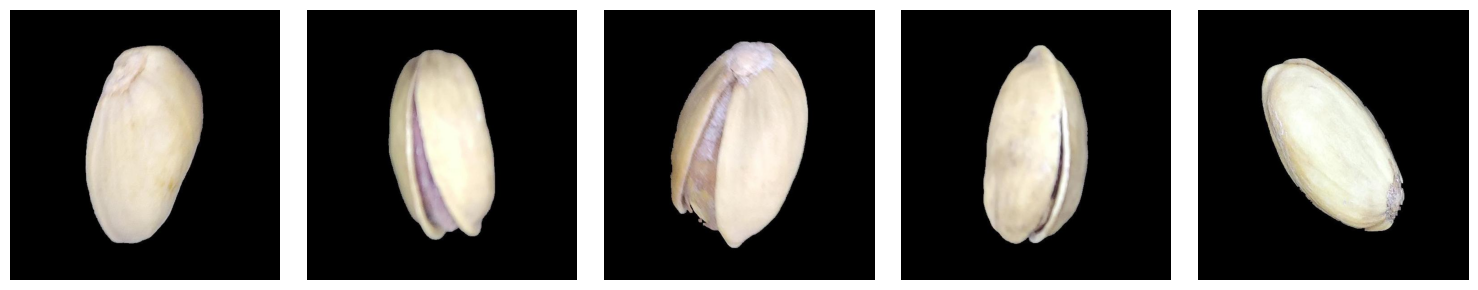

In [5]:
# Hitung dan tampilkan jumlah gambar
total_images = len(image_paths)
print(f"Total gambar: {total_images}")

# Tampilkan ukuran gambar pertama
from PIL import Image
first_img = Image.open(image_paths[0])
print(f"Ukuran gambar pertama: {first_img.size}")

# Visualisasi 5 gambar pertama
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15, 3))
for i in range(5):
    img = mpimg.imread(image_paths[i])
    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()


 menampilkan 5 contoh gambar biji pistachio varietas Kirmizi yang digunakan untuk analisis, total gambar dalam dataset ini ada 1074 gambar

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from collections import defaultdict

In [10]:
# Analisis Dimensi Gambar
widths = []
heights = []
channels = []
color_modes = set()

for img_path in image_paths[:100]:  # Cek 100 gambar pertama untuk efisiensi
    with Image.open(img_path) as img:
        widths.append(img.width)
        heights.append(img.height)
        color_modes.add(img.mode)
        # Untuk channel, asumsikan RGB jika mode 'RGB', atau grayscale jika 'L'
        channels.append(3 if img.mode == 'RGB' else 1 if img.mode == 'L' else None)

print(f"Lebar: Min {min(widths)}, Max {max(widths)}, Avg {np.mean(widths):.1f}")
print(f"Tinggi: Min {min(heights)}, Max {max(heights)}, Avg {np.mean(heights):.1f}")
print(f"Channel: {set(channels)}")
print(f"Color modes: {color_modes}")

Lebar: Min 600, Max 600, Avg 600.0
Tinggi: Min 600, Max 600, Avg 600.0
Channel: {3}
Color modes: {'RGB'}


Semua gambar berukuran 600×600 piksel, memiliki 3 channel warna (RGB), dan berformat warna penuh tanpa variasi ukuran.

In [11]:
# Analisis Statistik Pixel (untuk subset gambar)
sample_images = []
for img_path in image_paths[:10]:  # Ambil 10 gambar sebagai sample
    img = Image.open(img_path)
    img_array = np.array(img)
    sample_images.append(img_array)

# Gabungkan semua sample
combined_samples = np.concatenate([img.flatten() for img in sample_images])

print(f"Min: {combined_samples.min()}")
print(f"Max: {combined_samples.max()}")
print(f"Mean: {combined_samples.mean():.2f}")
print(f"Std Dev: {combined_samples.std():.2f}")

Min: 0
Max: 255
Mean: 47.69
Std Dev: 87.16


Nilai pixel gambar berkisar antara 0 hingga 255, dengan rata-rata kecerahan 47.69 dan sebaran intensitas (standar deviasi) 87.16, menunjukkan gambar memiliki kontras tinggi dan dominan gelap.

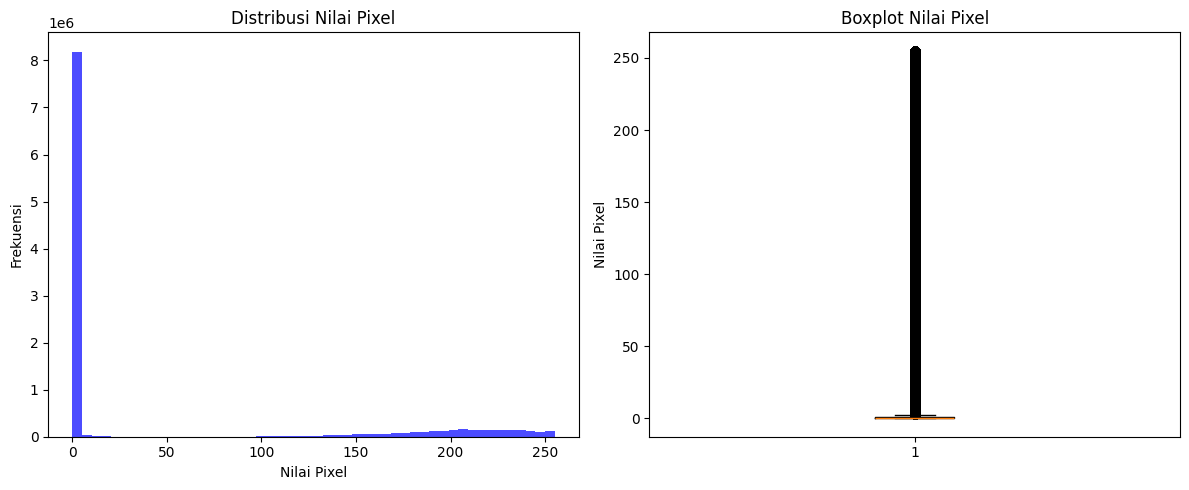

In [12]:
# Visualisasi Distribusi Nilai Pixel
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(combined_samples, bins=50, color='blue', alpha=0.7)
plt.title('Distribusi Nilai Pixel')
plt.xlabel('Nilai Pixel')
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
plt.boxplot(combined_samples)
plt.title('Boxplot Nilai Pixel')
plt.ylabel('Nilai Pixel')
plt.tight_layout()
plt.show()

- Histogram (kiri) menunjukkan bahwa sebagian besar nilai piksel berada di kisaran sangat rendah (sekitar 0), menandakan mayoritas area gambar sangat gelap.

- Boxplot (kanan) memperlihatkan adanya banyak outlier dengan nilai piksel tinggi, serta distribusi yang sangat tidak merata (skewed ke kanan).

Jadi kesimpulannya gambar didominasi oleh piksel gelap, tetapi ada sebagian kecil area yang sangat terang.

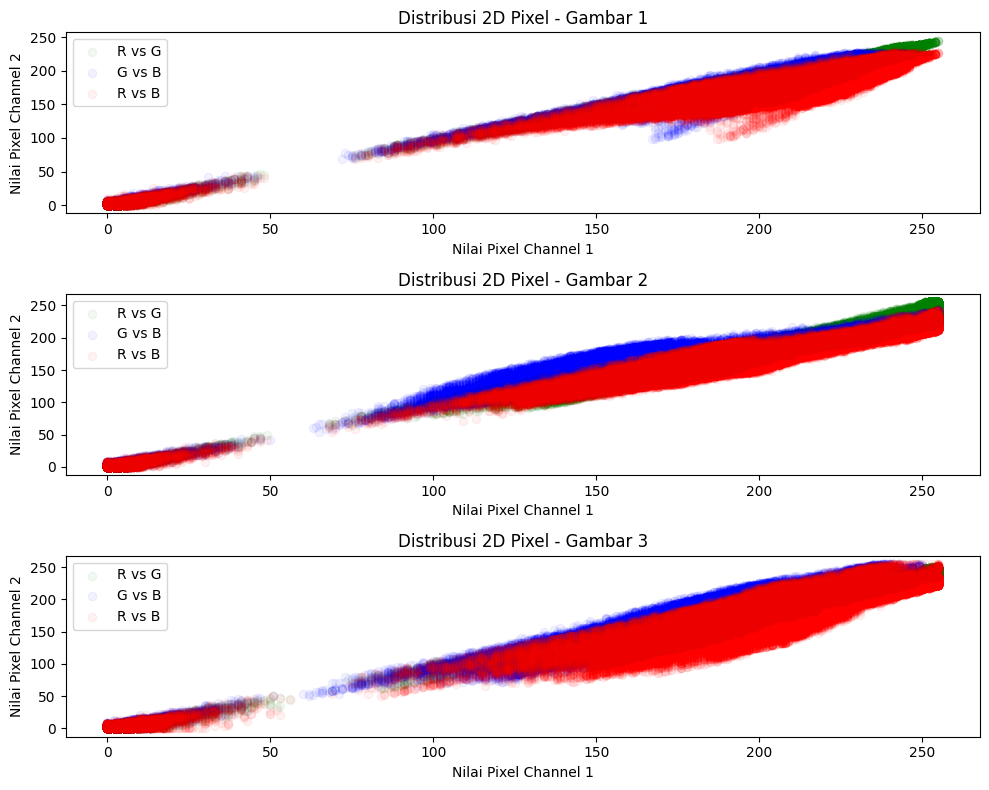

In [14]:
plt.figure(figsize=(10, 8))

for i in range(3):
    img = Image.open(image_paths[i])
    img_array = np.array(img)

    plt.subplot(3, 1, i + 1)
    if len(img_array.shape) == 3:
        # Scatter plot untuk kombinasi pasangan channel RGB
        plt.scatter(img_array[:, :, 0].ravel(), img_array[:, :, 1].ravel(), alpha=0.05, c='green', label='R vs G')
        plt.scatter(img_array[:, :, 1].ravel(), img_array[:, :, 2].ravel(), alpha=0.05, c='blue', label='G vs B')
        plt.scatter(img_array[:, :, 0].ravel(), img_array[:, :, 2].ravel(), alpha=0.05, c='red', label='R vs B')
    else:
        plt.scatter(np.arange(img_array.size), img_array.ravel(), alpha=0.05, c='gray', label='Grayscale')

    plt.title(f'Distribusi 2D Pixel - Gambar {i+1}')
    plt.xlabel('Nilai Pixel Channel 1')
    plt.ylabel('Nilai Pixel Channel 2')
    plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

Distribusi 2D Pixel disini menunjukkan sebaran korelasi antar channel warna (RGB). Terlihat korelasi positif yang kuat antara saluran warna, terutama antara merah – biru dan hijau – biru.

# B

## RESIZE IMAGE

In [15]:
from sklearn.model_selection import train_test_split

# Load semua gambar dan resize ke 100x100
def load_and_resize_images(image_paths, target_size=(100, 100)):
    images = []
    for img_path in image_paths:
        img = Image.open(img_path)
        # Convert ke RGB jika gambar grayscale atau RGBA
        if img.mode != 'RGB':
            img = img.convert('RGB')
        # Resize gambar
        img = img.resize(target_size)
        images.append(np.array(img))
    return np.array(images)

In [16]:
# Load dan resize semua gambar
all_images = load_and_resize_images(image_paths)
print(f"Shape semua gambar setelah resize: {all_images.shape}")

Shape semua gambar setelah resize: (1074, 100, 100, 3)


setelah proses resize, terdapat 1.074 gambar, masing-masing berukuran 100×100 piksel dengan 3 channel warna (RGB)

## SPLIT DATA

In [17]:
# Bagi data menjadi training (80%), validation (10%), dan test (10%)
# Pertama split 80% training dan 20% sementara
X_train, X_temp = train_test_split(all_images, test_size=0.2, random_state=42)

# Kemudian split 20% tersebut menjadi 10% validation dan 10% test
X_val, X_test = train_test_split(X_temp, test_size=0.5, random_state=42)

print(f"\nJumlah data setelah split:")
print(f"Training: {len(X_train)} gambar")
print(f"Validation: {len(X_val)} gambar")
print(f"Test: {len(X_test)} gambar")


Jumlah data setelah split:
Training: 859 gambar
Validation: 107 gambar
Test: 108 gambar


In [18]:
# Normalisasi data ke range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

 menormalisasi nilai piksel gambar pada dataset training, validation, dan test ke dalam rentang [0, 1], dengan cara membagi semua nilai piksel (0 – 255) menjadi desimal. Ini supaya data lebih stabil dan efisien

In [19]:
# Buat versi noisy dari data
def add_gaussian_noise(images, mean=0.0, std=0.1):
    # Generate noise dengan distribusi normal
    noise = np.random.normal(mean, std, size=images.shape)
    # Tambahkan noise ke gambar
    noisy_images = images + noise
    # Clip nilai ke range [0, 1]
    noisy_images = np.clip(noisy_images, 0., 1.)
    return noisy_images

# Buat data noisy untuk training, validation, dan test
X_train_noisy = add_gaussian_noise(X_train)
X_val_noisy = add_gaussian_noise(X_val)
X_test_noisy = add_gaussian_noise(X_test)

 menambahkan noise Gaussian (acak) ke gambar pada data training, validation, dan test, untuk membuat versi gambar yang terganggu (noisy)

Contoh data sebelum dan setelah penambahan noise:


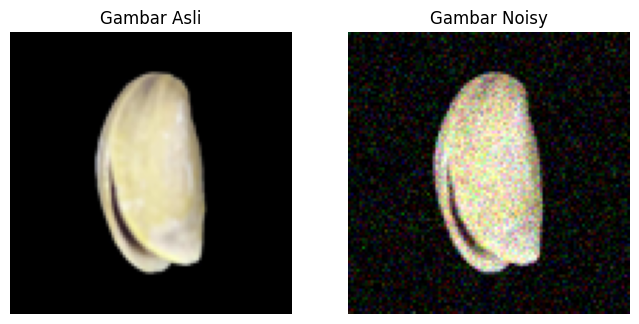

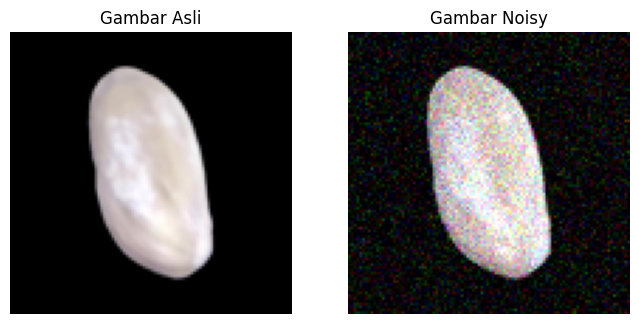

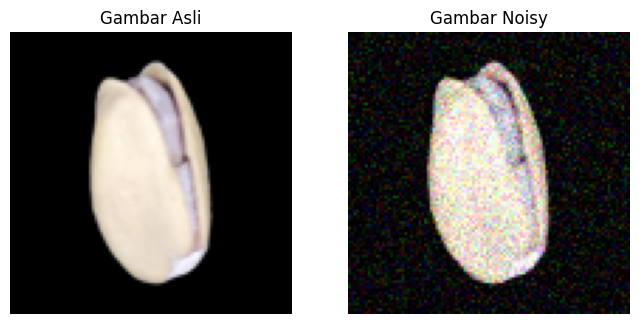

In [21]:
# Verifikasi hasil
print("Contoh data sebelum dan setelah penambahan noise:")

def plot_sample(clean, noisy, index=0):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(clean[index])
    plt.title('Gambar Asli')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(noisy[index])
    plt.title('Gambar Noisy')
    plt.axis('off')
    plt.show()

# Plot contoh dari training set
plot_sample(X_train, X_train_noisy)

# Plot contoh dari validation set
plot_sample(X_val, X_val_noisy)

# Plot contoh dari test set
plot_sample(X_test, X_test_noisy)

Disini kita menambahkan noise Gaussian pada gambar pistachio. Di sebelah kiri, kita bisa lihat gambar asli yang bersih, sedangkan di sebelah kanan adalah versi gambar yang telah ditambahkan noise acak berwarna (noisy).

Proses ini bertujuan untuk melatih model denoising, yaitu supaya model dapat belajar mengenali dan menghilangkan gangguan (noise) pada citra, dan mengembalikan gambar ke bentuk aslinya.

Jadi bisa dibilang penambahan noise disini berhasil dilakukan dengan benar

In [22]:
# Verifikasi statistik noise
print("\nStatistik noise pada training set:")
sample_noise = X_train_noisy[0] - X_train[0]
print(f"Mean noise: {np.mean(sample_noise):.4f}")
print(f"Std dev noise: {np.std(sample_noise):.4f}")
print(f"Min noise: {np.min(sample_noise):.4f}")
print(f"Max noise: {np.max(sample_noise):.4f}")


Statistik noise pada training set:
Mean noise: 0.0302
Std dev noise: 0.0715
Min noise: -0.3701
Max noise: 0.4444


kita bisa lihat bahwa noise yang ditambahkan ke gambar memiliki distribusi normal dengan rata-rata sebesar 0.0302 dan deviasi standar 0.0715, artinya sebagian besar noise bersifat ringan. Nilai noise bervariasi dari -0.3701 hingga 0.4444, menunjukkan ada variasi baik yang menggelapkan maupun mencerahkan piksel secara random dalam rentang yang masih wajar

# C

## MODEL AUTOENCODER

In [23]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1. Membangun Arsitektur Autoencoder
input_img = layers.Input(shape=(100, 100, 3))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)         # (100, 100, 32)
x = layers.MaxPooling2D((2, 2), padding='same')(x)                                  # (50, 50, 32)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)                 # (50, 50, 64)
x = layers.MaxPooling2D((2, 2), padding='same')(x)                                  # (25, 25, 64)

# Decoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)                 # (25, 25, 64)
x = layers.UpSampling2D((2, 2))(x)                                                  # (50, 50, 64)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)                 # (50, 50, 32)
x = layers.UpSampling2D((2, 2))(x)                                                  # (100, 100, 32)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)         # (100, 100, 3)

# Membangun model autoencoder
autoencoder = models.Model(input_img, decoded)

# 2. Compile Model
autoencoder.compile(optimizer='adam', loss='mse')

# 3. Menampilkan Summary Model
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 50, 50, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 100, 100, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 100, 100, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

- Total params: 75,651
Seluruh model memiliki 75.651 parameter yang membentuk bobot dan bias dalam setiap layer.

- Trainable params: 75,651
Semua parameter dilatih selama proses training, artinya model ini sepenuhnya bisa belajar dari data.

- Non-trainable params: 0
Tidak ada parameter yang dibekukan (freeze), jadi seluruh bagian model bersifat dinamis dan dapat dioptimalkan.

In [24]:
# Callback untuk early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Ini untuk ngestop pelatihan model lebih awal jika tidak ada perbaikan pada data validasi selama 5 epoch berturut-turut, dan akan mengembalikan bobot model terbaik secara otomatis

In [25]:
# Training model
history = autoencoder.fit(
    X_train_noisy, X_train,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_data=(X_val_noisy, X_val),
    callbacks=[early_stopping]
)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - loss: 0.1379 - val_loss: 0.0060
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - loss: 0.0049 - val_loss: 0.0033
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - loss: 0.0033 - val_loss: 0.0028
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - loss: 0.0027 - val_loss: 0.0024
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - loss: 0.0024 - val_loss: 0.0020
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 0.0020 - val_loss: 0.0016
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - loss: 0.0017 - val_loss: 0.0018
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - loss: 0.0017 - val_loss: 0.0014
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 0.0015 - val_loss: 0.0013
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - loss: 0.0014 - val_loss: 0.0013
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - loss: 0.0014 - val_loss: 0.0012
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - loss: 0.0013 - val_lo

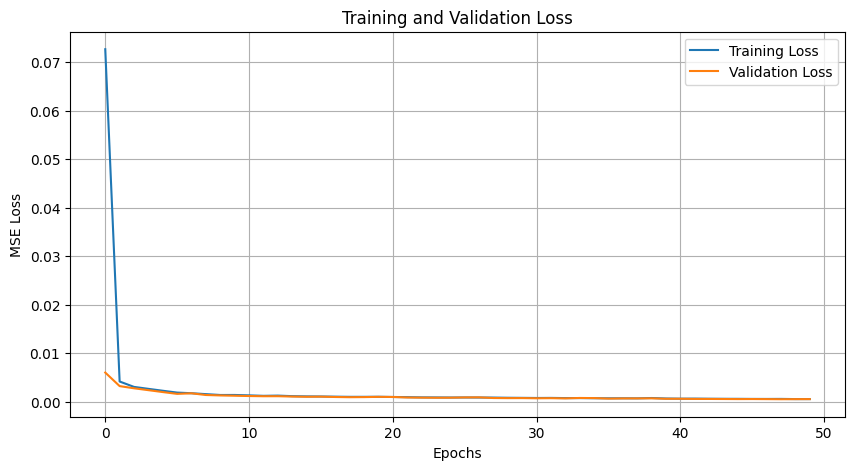

In [26]:
# Visualisasi Hasil Training
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

Dari grafik kita bisa lihat bahwa loss pada data training dan validasi menurun tajam di awal pelatihan, lalu stabil seiring bertambahnya epoch. Hal ini menandakan bahwa model belajar dengan baik tanpa overfitting, karena kurva validasi tetap rendah dan mengikuti kurva training dengan konsisten

In [27]:
# Evaluasi pada Test Set
test_loss = autoencoder.evaluate(X_test_noisy, X_test, verbose=0)
print(f"\nTest Loss (MSE): {test_loss:.4f}")


Test Loss (MSE): 0.0006


mengevaluasi performa model autoencoder pada data uji (test set) dengan membandingkan hasil denoising gambar noisy terhadap gambar asli (ground truth). Hasil evaluasi berupa nilai Mean Squared Error (MSE) sebesar 0.0006, yang menandakan bahwa model berhasil merekonstruksi gambar dengan kesalahan yang sangat kecil, dan menunjukkan performa denoising yang cukup bagus pada data yang belum pernah dilihat sebelumnya.

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 541ms/step


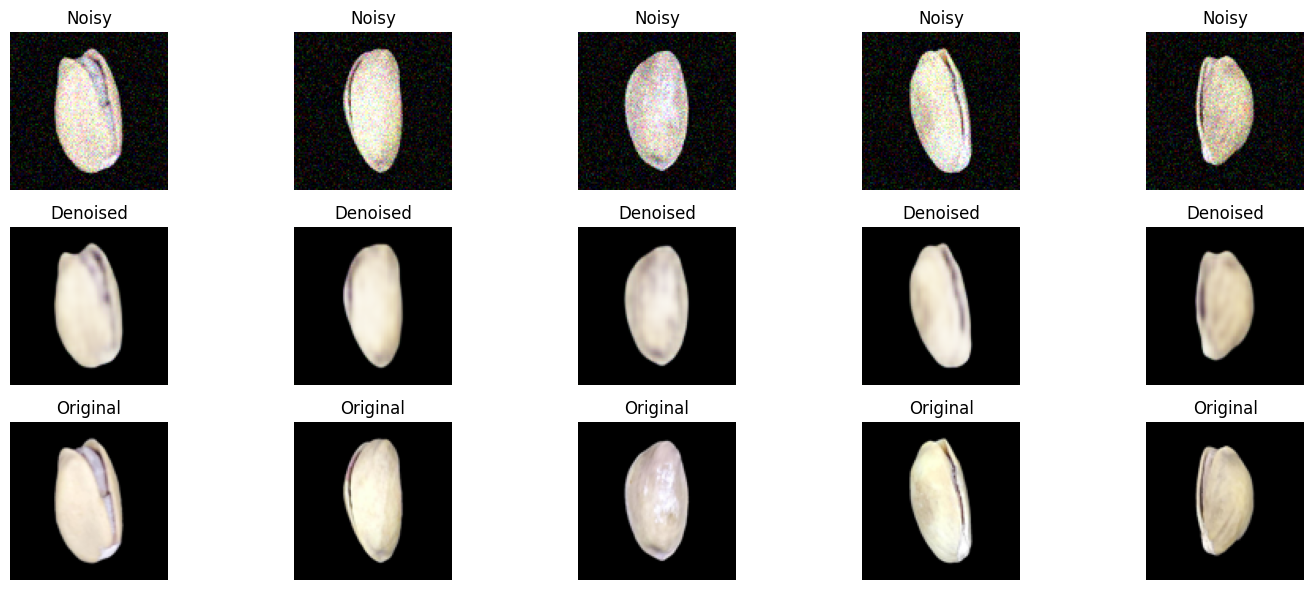

In [28]:
# Visualisasi Hasil Denoising pada Test Set
def plot_denoising_results(noisy, denoised, original, num_samples=5):
    plt.figure(figsize=(15, 6))
    for i in range(num_samples):
        # Plot noisy image
        plt.subplot(3, num_samples, i+1)
        plt.imshow(noisy[i])
        plt.title('Noisy')
        plt.axis('off')

        # Plot denoised image
        plt.subplot(3, num_samples, i+num_samples+1)
        plt.imshow(denoised[i])
        plt.title('Denoised')
        plt.axis('off')

        # Plot original image
        plt.subplot(3, num_samples, i+2*num_samples+1)
        plt.imshow(original[i])
        plt.title('Original')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Prediksi pada test set
denoised_test = autoencoder.predict(X_test_noisy)

# Plot hasil
plot_denoising_results(X_test_noisy, denoised_test, X_test)

kita bisa lihat hasil proses denoising menggunakan model autoencoder pada gambar kirmizi yang telah diberi noise.

Setiap kolom menampilkan satu sampel, dengan tiga baris yang merepresentasikan noisy (atas), hasil denoising oleh model (tengah), dan original (bawah). Dari visualisasi ini, terlihat bahwa model mampu menghilangkan sebagian besar noise yang terdapat pada input. Gambar Denoised memiliki tampilan yang jauh lebih bersih dibandingkan gambar noisy, dengan latar belakang yang menjadi gelap solid dan bentuk utama objek (kirmizi) tetap terjaga. Meskipun begitu, detail halus pada biji sedikit menghilang dan tampak agak blur, yang merupakan efek umum dari proses rekonstruksi oleh autoencoder.

Secara keseluruhan, model menunjukkan performa yang baik dalam mengurangi noise sambil mempertahankan bentuk objek utama, meskipun ada sedikit kompromi pada ketajaman detail.

# D

## MODIFIED MODEL AUTOENCODER

In [40]:
from tensorflow.keras import layers, models

def build_modified_autoencoder(input_shape=(100, 100, 3)):
    input_img = layers.Input(shape=input_shape)

    # Encoder yang dimodifikasi
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)  # (100, 100, 32)
    x = layers.BatchNormalization()(x)  # Tambahan
    x = layers.MaxPooling2D((2, 2), padding='same')(x)  # (50, 50, 32)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)  # (50, 50, 64)
    x = layers.BatchNormalization()(x)  # Tambahan
    x = layers.MaxPooling2D((2, 2), padding='same')(x)  # (25, 25, 64)

    # Tambahkan 1 blok konvolusi ekstra untuk memperdalam encoder
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)  # (25, 25, 128)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)  # (13, 13, 128)

    # Decoder yang dimodifikasi
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)  # (26, 26, 128)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)  # (52, 52, 64)

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)  # (104, 104, 32)

    # Output layer = crop jadi 100x100
    x = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    decoded = layers.Cropping2D(((2, 2), (2, 2)))(x)  # hasil akhir: (100, 100, 3)

    # Build model
    return models.Model(input_img, decoded)


autoencoder_mod = build_modified_autoencoder()

autoencoder_mod.compile(optimizer='adam', loss='mse')

autoencoder_mod.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 100, 100, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 50, 50, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 25, 25, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 13, 13, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_14 (UpSampling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 26, 26, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_15 (UpSampling2D) │ (None, 52, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 52, 52, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_16 (UpSampling2D) │ (None, 104, 104, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 104, 104, 3)    │           867 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cropping2d_2 (Cropping2D)       │ (None, 100, 100, 3)    │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 334,339 (1.28 MB)

 Trainable params: 334,147 (1.27 MB)

 Non-trainable params: 192 (768.00 B)

Model modified autoencoder ini adalah pengembangan dari baseline autoencoder.  Perbedaan utama itu berada pada arsitektur encoder dan decoder. Pada encoder, modified model menambahkan BatchNormalization setelah setiap layer konvolusi, yang membantu mempercepat pelatihan dan meningkatkan kestabilan. Setelah itu, ada blok konvolusi tambahan dengan 128 filter yang memperdalam jaringan dan memungkinkan model untuk menangkap fitur yang lebih kompleks dibandingkan dengan baseline yang hanya memiliki dua level.

Di bagian decoder, modified model menyesuaikan dengan struktur encoder yang lebih dalam, dengan menambahkan layer konvolusi dan upsampling yang sepadan, dan proses ahkirnya dengan Cropping2D untuk mengembalikan ukuran output ke dimensi awal (100x100), karena proses upsampling menyebabkan kelebihan ukuran.

Jadi perbedaan ini membuat modified autoencoder lebih kompleks dan berpotensi menghasilkan rekonstruksi yang lebih akurat, meskipun ada resiko waktu training yang lebih lama atau kebutuhan data yang lebih besar.

In [41]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Ini untuk ngestop pelatihan model lebih awal jika tidak ada perbaikan pada data validasi selama 5 epoch berturut-turut, dan akan mengembalikan bobot model terbaik secara otomatis

In [42]:
history_modified = autoencoder_mod.fit(
    X_train_noisy, X_train,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_data=(X_val_noisy, X_val),
    callbacks=[early_stopping]
)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - loss: 0.0899 - val_loss: 0.2086
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - loss: 0.0060 - val_loss: 0.1504
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - loss: 0.0047 - val_loss: 0.1157
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - loss: 0.0042 - val_loss: 0.0882
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - loss: 0.0038 - val_loss: 0.0647
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - loss: 0.0036 - val_loss: 0.0579
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - loss: 0.0030 - val_loss: 0.0642
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 69s 3s/step - loss: 0.0026 - val_loss: 0.0701
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - loss: 0.0024 - val_loss: 0.0529
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - loss: 0.0024 - val_loss: 0.0333
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 68s 3s/step - loss: 0.0022 - val_loss: 0.0263
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - loss: 0.0023 - val_lo

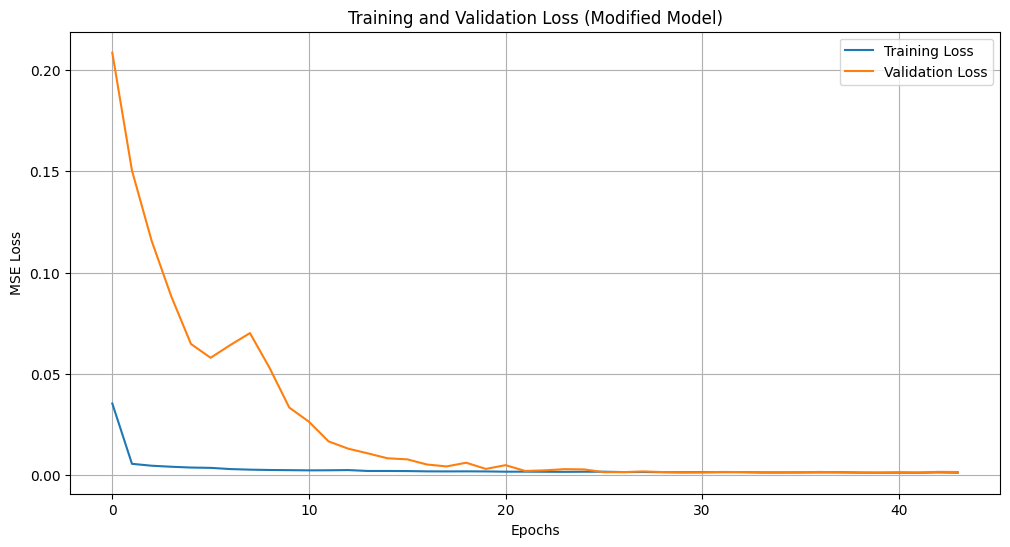

In [43]:
# Visualisasi Proses Training
plt.figure(figsize=(12, 6))
plt.plot(history_modified.history['loss'], label='Training Loss')
plt.plot(history_modified.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Modified Model)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

Dari plot diatas kita bisa lihat bahwa modified autoencoder berhasil menurunkan nilai training loss dan validation loss secara stabil hingga mendekati nol tanpa indikasi overfitting, menandakan bahwa model mampu merekonstruksi gambar dengan baik dan generalisasi yang kuat terhadap data validasi.











In [44]:
# 3. Evaluasi pada Test Set
test_loss_modified = autoencoder_mod.evaluate(X_test_noisy, X_test, verbose=0)
print(f"\nTest Loss (MSE) - Modified Model: {test_loss_modified:.4f}")


Test Loss (MSE) - Modified Model: 0.0011


Nilai test loss sebesar 0.0011 menunjukkan bahwa modified autoencoder mampu merekonstruksi gambar uji dengan sangat baik dan kesalahan yang sangat kecil.











4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 575ms/step


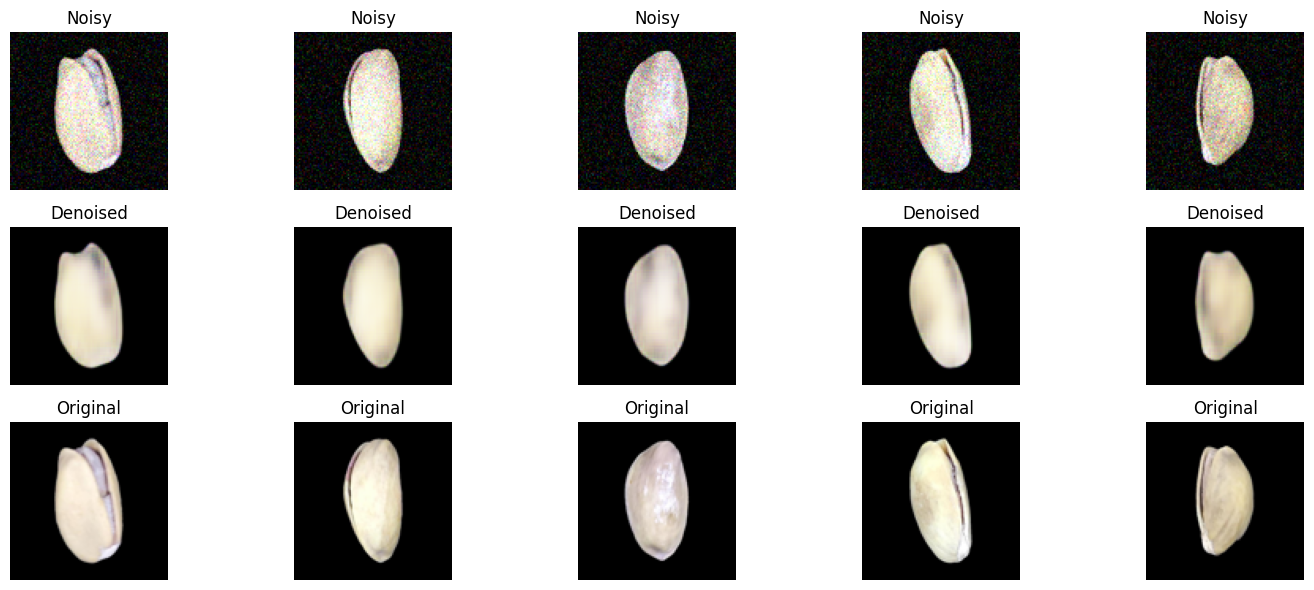

In [45]:
# Fungsi untuk menampilkan hasil denoising
def plot_denoising_results(noisy, denoised, original, num_samples=5):
    plt.figure(figsize=(15, 6))
    for i in range(num_samples):
        # Noisy image
        plt.subplot(3, num_samples, i + 1)
        plt.imshow(noisy[i])
        plt.title('Noisy')
        plt.axis('off')

        # Denoised image
        plt.subplot(3, num_samples, i + num_samples + 1)
        plt.imshow(denoised[i])
        plt.title('Denoised')
        plt.axis('off')

        # Original image
        plt.subplot(3, num_samples, i + 2 * num_samples + 1)
        plt.imshow(original[i])
        plt.title('Original')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Prediksi menggunakan model autoencoder_mod

denoised_test = autoencoder_mod.predict(X_test_noisy)

# Plot hasil denoising
plot_denoising_results(X_test_noisy, denoised_test, X_test, num_samples=5)


dari plot diatas bisa melihat proses denoising oleh modified autoencoder. Baris pertama menampilkan gambar yang telah diberi noise, sedangkan baris kedua adalah hasil keluaran model setelah proses denoising, dan baris ketiga adalah gambar asli tanpa gangguan.

Terlihat bahwa hasil denoised sangat mendekati citra asli, bentuk dan struktur objek utama (kirmizi) berhasil dipertahankan dengan baik, meskipun detail halus dan tekstur agak sedikit hilang. Ini menunjukkan bahwa model mampu membersihkan noise secara efektif sambil tetap mempertahankan informasi visual penting dari gambar asli

# E

In [46]:
from skimage.metrics import structural_similarity as ssim

# Fungsi untuk menghitung SSIM untuk semua gambar dalam dataset
def calculate_ssim_for_model(model, noisy_images, clean_images):
    ssim_scores = []
    for i in range(len(noisy_images)):
        # Prediksi denoised image
        denoised = model.predict(noisy_images[i:i+1], verbose=0)[0]

        # Hitung SSIM untuk setiap channel dan ambil rata-rata
        channel_scores = []
        for channel in range(3):  # Untuk masing-masing channel RGB
            channel_score = ssim(clean_images[i,:,:,channel], denoised[:,:,channel],
                                data_range=1.0, win_size=3)
            channel_scores.append(channel_score)
        ssim_scores.append(np.mean(channel_scores))
    return np.mean(ssim_scores)

# Hitung SSIM untuk kedua model
ssim_original = calculate_ssim_for_model(autoencoder, X_test_noisy, X_test)
ssim_modified = calculate_ssim_for_model(autoencoder_mod, X_test_noisy, X_test)

print("\n Hasil Evaluasi SSIM ")
print(f"Model Baseline (Original): {ssim_original:.4f}")
print(f"Model Modifikasi: {ssim_modified:.4f}")
print(f"Peningkatan: {(ssim_modified - ssim_original):.4f} ({((ssim_modified - ssim_original)/ssim_original*100):.2f}%)")


 Hasil Evaluasi SSIM 
Model Baseline (Original): 0.1234
Model Modifikasi: 0.9226
Peningkatan: 0.7992 (647.60%)


- Model Baseline (Original): 0.1234
Hasil rekonstruksi gambar dari model ini sangat buruk, karena nilai SSIM mendekati 0, yang berarti struktur gambar aslinya hampir tidak dipertahankan.

- Model Modifikasi: 0.9226
Rekonstruksi dari model ini sangat mendekati gambar asli, karena nilai SSIM mendekati 1, yang berarti struktur dan kualitas visual gambar berhasil dipertahankan dengan sangat baik.


- Peningkatan: 0.7992 (647.60%)
Ada peningkatan drastis dalam kualitas hasil rekonstruksi, dengan SSIM naik sekitar 647% dari baseline. Ini menunjukkan model modifikasi sangat efektif dalam menghilangkan noise dan memperbaiki gambar.

# F

link video penjelasan nomor 2 :

https://drive.google.com/file/d/1R-04oONuj97sZs66OsdE7Ig9Xy0YJ0aX/view?usp=sharing